In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files

In [3]:
files_upload = files.upload()

Saving Height_Age_Dataset.csv to Height_Age_Dataset.csv


In [4]:
data1 = pd.read_csv('/content/Height_Age_Dataset.csv')

In [5]:
data1

,Age,Height
0,10,138
1,11,138
2,12,138
3,13,139
4,14,139
...,...,...
66,76,204
67,77,205
68,78,206
69,79,207


In [9]:
X = data1.iloc[:,:1].values
y = data1.iloc[:, 1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.30,random_state=0)

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
DTreg = DecisionTreeRegressor(random_state=0)

In [12]:
DTreg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [13]:
y_pred_dtr = DTreg.predict(X_test)

In [14]:
from sklearn import metrics

In [15]:
r_square = metrics.r2_score(y_test , y_pred_dtr)

In [16]:
print('R Square Error associated with Decision Tree Regression is: ',r_square)

R Square Error associated with Decision Tree Regression is:  0.9740973499964157


In [17]:
#Visualise the decision Tree
X_val = np.arange(min(X_train), max(X_train), 0.01)

In [25]:
X_val = X_val.reshape(len(X_val), 1)

(<Figure size 72x72 with 0 Axes>,)

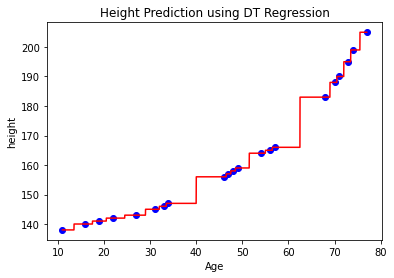

<Figure size 72x72 with 0 Axes>

In [26]:
#plot the training data
plt.scatter(X_train, y_train, color='blue', label="train data")

#plot the predicted data
plt.plot(X_val, DTreg.predict(X_val), color='red')

#Define Title
plt.title("Height Prediction using DT Regression")

plt.xlabel('Age')
plt.ylabel('height')
plt.figure(figsize=(1,1)),


In [28]:
height_pred = DTreg.predict([[41]])

In [29]:
height_pred

array([156.])

In [31]:
print("Predicted Height:% d" % height_pred)

Predicted Height: 156


In [32]:
from sklearn.tree import export_graphviz

export_graphviz(DTreg, out_file = 'dtregression.dot',  feature_names = ['Age'])